# Análise dos Componentes Principais por Matriz de Correlação
1. Importar o banco 
2. Reduzir para as variáveis de interesse
3. Padronize as variáveis de interesse
4. Obter a matriz de correlação
5. Obtenha os Autovetores e Autovalores
6. Obtenha as componentes


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Importando banco de dados

In [2]:
BD_dec = pd.read_csv("../Banco/decathlon(1).csv", index_col=0)
BD_dec.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
Athlets,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


## Reduzindo para as variáveis de interesse

In [3]:
variaveis_interesse = BD_dec.drop(['Rank',	'Points',	'Competition'],axis=1)
variaveis_interesse.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
Athlets,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4


## Padronizando as variáveis de interesse

In [5]:
x = np.matrix(variaveis_interesse)
x = np.asarray(x)

scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)
#print(scaled_x)

## Obtendo a matriz de correlação

In [ ]:
correl = variaveis_interesse.corr()
print(correl)

                 100m  Long.jump  Shot.put  High.jump      400m  110m.hurdle  \
100m         1.000000  -0.598678 -0.356482  -0.246253  0.520298     0.579889   
Long.jump   -0.598678   1.000000  0.183304   0.294644 -0.602063    -0.505410   
Shot.put    -0.356482   0.183304  1.000000   0.489212 -0.138433    -0.251616   
High.jump   -0.246253   0.294644  0.489212   1.000000 -0.187957    -0.283289   
400m         0.520298  -0.602063 -0.138433  -0.187957  1.000000     0.547988   
110m.hurdle  0.579889  -0.505410 -0.251616  -0.283289  0.547988     1.000000   
Discus      -0.221708   0.194310  0.615768   0.369218 -0.117879    -0.326201   
Pole.vault  -0.082537   0.204014  0.061182  -0.156181 -0.079292    -0.002704   
Javeline    -0.157746   0.119759  0.374956   0.171880  0.004232     0.008743   
1500m       -0.060546  -0.033686  0.115803  -0.044903  0.408106     0.037540   

               Discus  Pole.vault  Javeline     1500m  
100m        -0.221708   -0.082537 -0.157746 -0.060546  
Long.ju

<Axes: >

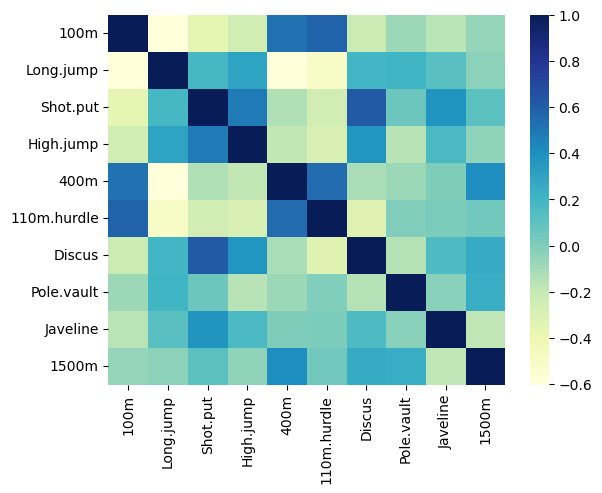

In [ ]:
sns.heatmap(correl,xticklabels = correl.columns,yticklabels = correl.columns,cmap='YlGnBu')

## Criando um Data Frame com os dados padronizados

In [ ]:
BD_dec_padr = pd.DataFrame(data=scaled_x, columns=variaveis_interesse.columns)
BD_dec_padr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.161478,1.023937e+00,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
1,-0.916293,4.479724e-01,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
2,0.084494,1.279921e-01,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
3,0.084494,-9.599408e-02,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
4,1.316232,-5.439665e-01,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656
5,0.430920,1.087933e+00,-0.205171,0.036089,-0.821859,-0.806553,-0.966794,0.573807,-1.373143,-0.080215
6,0.507904,1.279921e-01,-1.224437,0.377545,-0.874523,-0.935308,0.402947,-1.247098,-0.618045,-0.956190
7,-0.646850,1.599901e-01,-0.880588,1.743369,0.257754,-0.484665,0.025294,-1.247098,-0.408295,0.526896
8,2.470986,-1.439911e+00,0.114117,-0.305367,0.459633,0.695593,0.981415,0.573807,-1.255683,-1.467898
9,1.431707,9.599408e-01,-0.082368,-1.329735,1.302257,0.974563,0.199134,0.209626,-0.236301,0.526896


## Obtendo os componentes principais

In [ ]:
pca = PCA(n_components=10)
pca_decomp = pca.fit(scaled_x)

In [ ]:
pca.components_

array([[-0.42829627,  0.41015201,  0.34414444,  0.31619436, -0.3757157 ,
        -0.41255442,  0.30542571,  0.02783081,  0.15319802, -0.03210733],
       [ 0.14198909, -0.26207936,  0.45394697,  0.2657761 ,  0.432046  ,
         0.17359096,  0.4600244 , -0.13684105,  0.24050715,  0.35980486],
       [-0.15557953,  0.15372674, -0.01972378, -0.21894349,  0.11091758,
        -0.07815576,  0.0362377 ,  0.58361717, -0.32874217,  0.65987362],
       [-0.03678703,  0.09901016,  0.18539458, -0.13189684,  0.02850297,
         0.28290068, -0.25259074,  0.5364948 ,  0.69285498, -0.15669648],
       [-0.36518741, -0.04432336, -0.13431954, -0.6712176 ,  0.10597034,
        -0.19857266,  0.1266777 , -0.39873734,  0.3687312 ,  0.18557094],
       [ 0.29607739, -0.30612478,  0.30547299, -0.46777116, -0.33252178,
        -0.09963776,  0.44937288,  0.26166458, -0.16320268, -0.29826888],
       [-0.38177608, -0.62769317,  0.30972542,  0.09145002,  0.12442114,
        -0.3573303 , -0.42988982,  0.09796019

In [ ]:
pca.explained_variance_ratio_


array([3.35370318, 1.7805593 , 1.4400396 , 1.08327161, 0.70189287,
       0.6142504 , 0.46251615, 0.4067985 , 0.22018522, 0.18678317])

In [ ]:
np.round(pca.explained_variance_ratio_,3)*100

array([32.7, 17.4, 14. , 10.6,  6.8,  6. ,  4.5,  4. ,  2.1,  1.8])

## Screen Plot(Gráfico de Cotovelo)

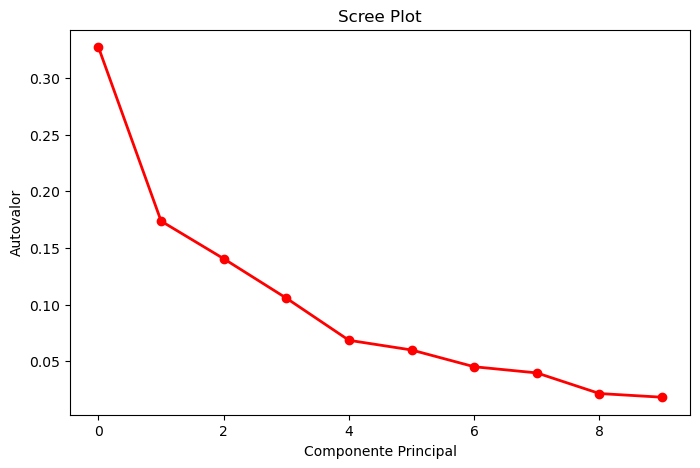

In [ ]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')
plt.show()

In [ ]:
X = np.matrix(BD_dec_padr.iloc[:,0:10])
pca.transform(np.asarray(X))

array([[ 7.91627717e-01,  7.71611196e-01,  8.26841194e-01,
         1.17462736e+00, -7.07159025e-01, -1.03062025e+00,
        -5.51522857e-01, -4.35655499e-01, -1.37558873e-01,
         5.00773776e-01],
       [ 1.23499056e+00,  5.74578065e-01,  2.14124697e+00,
        -3.54844832e-01,  1.97457138e+00,  6.90125659e-01,
        -7.07974078e-01, -6.03419042e-01, -6.49244121e-01,
        -2.66119255e-01],
       [ 1.35821494e+00,  4.84020901e-01,  1.95625799e+00,
        -1.85652411e+00, -7.95214721e-01,  7.32751223e-01,
        -1.89939198e-01, -2.50296933e-01, -8.00653566e-01,
         5.23268830e-01],
       [-6.09515083e-01, -8.74628529e-01,  8.89940662e-01,
         2.22061245e+00, -3.61636187e-01,  2.75598190e-01,
         4.96107001e-02,  6.74580823e-02, -7.23281017e-01,
         1.88459291e-01],
       [-5.85968338e-01,  2.13095422e+00, -1.22515680e+00,
         8.73579149e-01, -1.25136918e+00, -1.04605685e-01,
        -5.73925477e-01,  9.46036093e-02, -2.02216418e-01,
         5.

In [ ]:
PCA1 = pca.transform(np.asarray(X))[:,0]
PCA2 = pca.transform(np.asarray(X))[:,1]

In [ ]:
BD_dec['PCA1'] = PCA1
BD_dec['PCA2'] = PCA2

In [ ]:
BD_dec_padr

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.161478,1.023937e+00,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
1,-0.916293,4.479724e-01,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
2,0.084494,1.279921e-01,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
3,0.084494,-9.599408e-02,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
4,1.316232,-5.439665e-01,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656
5,0.430920,1.087933e+00,-0.205171,0.036089,-0.821859,-0.806553,-0.966794,0.573807,-1.373143,-0.080215
6,0.507904,1.279921e-01,-1.224437,0.377545,-0.874523,-0.935308,0.402947,-1.247098,-0.618045,-0.956190
7,-0.646850,1.599901e-01,-0.880588,1.743369,0.257754,-0.484665,0.025294,-1.247098,-0.408295,0.526896
8,2.470986,-1.439911e+00,0.114117,-0.305367,0.459633,0.695593,0.981415,0.573807,-1.255683,-1.467898
9,1.431707,9.599408e-01,-0.082368,-1.329735,1.302257,0.974563,0.199134,0.209626,-0.236301,0.526896


In [ ]:
BD_dec

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar,0.791628,0.771611
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar,1.234991,0.574578
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.20,3,8099,Decastar,1.358215,0.484021
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar,-0.609515,-0.874629
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar,-0.585968,2.130954
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.10,6,8030,Decastar,0.356890,-1.684957
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar,0.271775,-1.093776
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar,0.587516,0.230730
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar,-1.995359,0.560996


In [ ]:
BD_dec.sort_values(by='PCA1',ascending=True)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
BOURGUIGNON,11.36,6.80,13.46,1.86,51.16,15.67,40.49,5.02,54.68,291.70,13,7313,Decastar,-3.979042,0.199860
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.40,58.62,296.12,28,7404,OlympicG,-2.857088,3.797845
Uldal,11.23,6.99,13.53,1.85,50.95,15.09,43.01,4.50,60.00,281.70,27,7495,OlympicG,-2.562260,0.245469
Lorenzo,11.10,7.03,13.22,1.85,49.34,15.38,40.22,4.50,58.36,263.08,24,7592,OlympicG,-2.408510,-1.582930
NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,12,7651,Decastar,-2.344974,-1.966375
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar,-1.995359,0.560996
Karlivans,11.33,7.26,13.30,1.97,50.54,14.98,43.34,4.50,52.92,278.67,25,7583,OlympicG,-1.994369,-0.294182
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar,-1.546076,0.488383
Turi,11.08,6.91,13.62,2.03,51.67,14.26,39.83,4.80,59.34,290.01,23,7708,OlympicG,-1.541813,0.427168


In [ ]:
BD_dec.sort_values(by='PCA2',ascending=False)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,PCA1,PCA2
Athlets,,,,,,,,,,,,,,,
Casarsa,11.36,6.68,14.92,1.94,53.20,15.39,48.66,4.40,58.62,296.12,28,7404,OlympicG,-2.857088,3.797845
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar,-0.585968,2.130954
Parkhomenko,11.14,6.61,15.69,2.03,51.04,14.88,41.90,4.80,65.82,277.94,20,7918,OlympicG,-1.069429,2.093182
Korkizoglou,10.86,7.07,14.81,1.94,51.16,14.96,46.07,4.70,53.05,317.00,26,7573,OlympicG,-0.957830,2.066386
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,OlympicG,4.038449,1.365826
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,OlympicG,0.925132,1.168652
Smith,10.85,6.81,15.24,1.91,49.27,14.01,49.02,4.20,61.52,272.74,14,8023,OlympicG,0.870311,1.059326
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,OlympicG,2.233461,1.041766
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,OlympicG,3.919365,0.836961
